In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

KeyboardInterrupt: 

1.Merge the data

In [ ]:
#读取数据
zhongxin_rent_df = pd.read_csv('zhongxin_rent.csv')
balitai_rent_df = pd.read_csv('balitai_rent.csv')
wuqing_rent_df = pd.read_csv('wuqing_rent.csv')
queyechang_rent_df = pd.read_csv('queyechang_rent_data.csv')

zhongxin_price_df = pd.read_csv('zhongxin_esf.csv')
balitai_price_df = pd.read_csv('balitai_esf.csv')
wuqing_price_df = pd.read_csv('wuqing_esf.csv')
queyechang_price_df = pd.read_csv('queyechang_esf_data.csv')

# 提取需要的列
zhongxin_rent_df = zhongxin_rent_df[['位置', '价格', '面积']]
balitai_rent_df = balitai_rent_df[['区域', '价格(元/月)', '面积']]
wuqing_rent_df = wuqing_rent_df[['位置', '价格', '面积']]
queyechang_rent_df = queyechang_rent_df[['区域', '价格', '面积']]

zhongxin_price_df = zhongxin_price_df[['区域', '单价', '面积']]
balitai_price_df = balitai_price_df[['区域', '单价', '面积']]
wuqing_price_df = wuqing_price_df[['区域', '单价', '面积']]
queyechang_price_df = queyechang_price_df[['区域', '单价', '面积']]

# 重命名列以统一格式
zhongxin_rent_df.columns = ['area_zu', 'price_rent', 'area_rent']
balitai_rent_df.columns = ['area_zu', 'price_rent', 'area_rent']
wuqing_rent_df.columns = ['area_zu', 'price_rent', 'area_rent']
queyechang_rent_df.columns = ['area_zu', 'price_rent', 'area_rent']

zhongxin_price_df.columns =['area_esf', 'price_house', 'area_house']
balitai_price_df.columns = ['area_esf', 'price_house', 'area_house']
wuqing_price_df.columns = ['area_esf', 'price_house', 'area_house']
queyechang_price_df.columns = ['area_esf', 'price_house', 'area_house']

# 在重命名列后增加区域名称统一操作（租金数据）：
zhongxin_rent_df['area_zu'] = '中新生态城'
balitai_rent_df['area_zu'] = '八里台'
wuqing_rent_df['area_zu'] = '武清'
queyechang_rent_df['area_zu'] = '劝业场'
# 对房价数据执行相同操作：
zhongxin_price_df['area_esf'] = '中新生态城'
balitai_price_df['area_esf'] = '八里台'
wuqing_price_df['area_esf'] = '武清'
queyechang_price_df['area_esf'] = '劝业场'

# 合并数据并重命名列
merged_rent_df = pd.concat([zhongxin_rent_df, balitai_rent_df, wuqing_rent_df, queyechang_rent_df], ignore_index=True)
merged_price_df = pd.concat([zhongxin_price_df, balitai_price_df, wuqing_price_df, queyechang_price_df], ignore_index=True)

# 提取数值部分并转换为浮点数
merged_rent_df['price_rent'] = merged_rent_df['price_rent'].astype(str).str.replace(',', '')  # 先去除千分位逗号
merged_rent_df['price_rent'] = merged_rent_df['price_rent'].str.extract(r'(\d+\.?\d*)\D*$', expand=False).astype(float)  # 提取核心数值
merged_rent_df['area_rent'] = merged_rent_df['area_rent'].str.extract(r'(\d+\.?\d*)').astype(float)

merged_price_df['price_house'] = merged_price_df['price_house'].str.extract(r'(\d+\.?\d*)').astype(float)
merged_price_df['area_house'] = merged_price_df['area_house'].str.extract(r'(\d+\.?\d*)').astype(float)

# 合并数据
merged_df = pd.merge(merged_rent_df, merged_price_df, how='outer', left_index=True, right_index=True)
merged_df.to_csv('merged_df.csv', index=False)
merged_df


NameError: name 'pd' is not defined

2.Data description

租金整体统计:
            count         mean          std    min     25%     50%     75%  \
price_rent  910.0  3317.404396  2763.745945  700.0  2000.0  2700.0  3400.0   
area_rent   910.0   100.653846    49.850359   14.0    71.0    93.0   118.0   

                max  
price_rent  30000.0  
area_rent     499.0  

房价整体统计:
              count          mean           std      min       25%       50%  \
price_house  4441.0  28642.261202  21794.120602  3805.00  12252.00  19615.00   
area_house   4441.0     93.912353     50.911714     7.06     55.73     94.81   

                  75%        max  
price_house  44097.00  130778.00  
area_house     123.74     387.63  

租金分地区统计:
        price_rent                                                            \
             count         mean          std     min     25%     50%     75%   
area_zu                                                                        
中新生态城        442.0  2627.954751  1052.038321   700.0  2000.0  2500.0  3000.0   
八里台   

C:\Users\张雷臻\AppData\Local\Temp\ipykernel_24192\3988817103.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  rent_box = sns.boxplot(


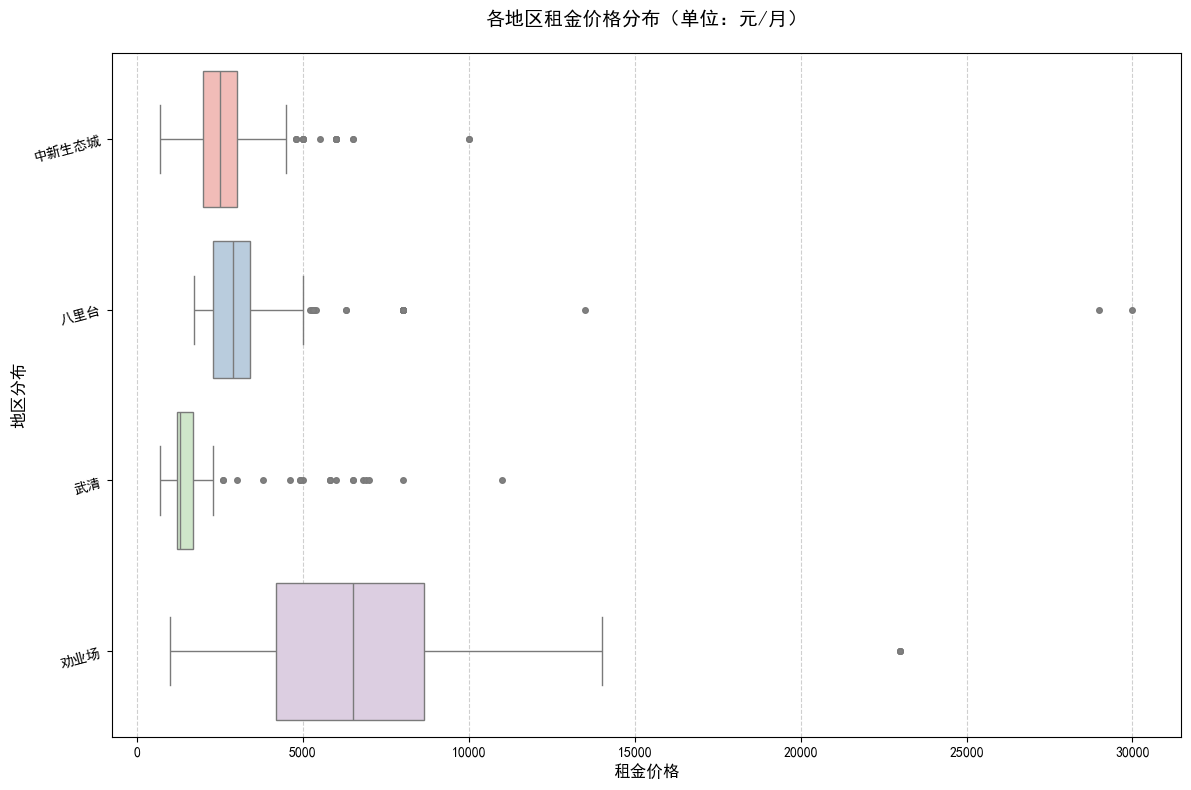

C:\Users\张雷臻\AppData\Local\Temp\ipykernel_24192\3988817103.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  price_box = sns.boxplot(


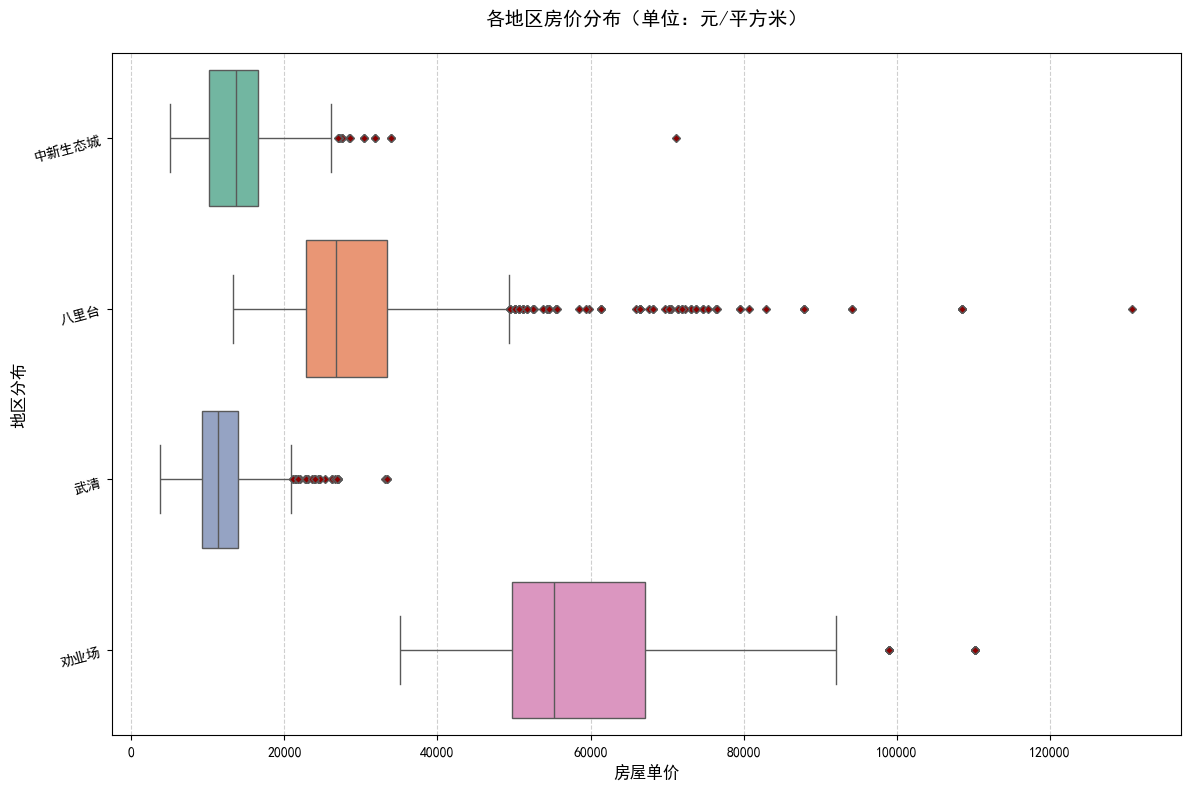

In [ ]:
# ====== 描述性统计 ======
# 租金数据整体统计
rent_stats_all = merged_rent_df[['price_rent', 'area_rent']].describe().T
print("租金整体统计:")
print(rent_stats_all)

# 房价数据整体统计
price_stats_all = merged_price_df[['price_house', 'area_house']].describe().T
print("\n房价整体统计:")
print(price_stats_all)

# 租金分地区统计
rent_stats_by_region = merged_rent_df.groupby('area_zu')[['price_rent', 'area_rent']].describe()
print("\n租金分地区统计:")
print(rent_stats_by_region)

# 房价分地区统计
price_stats_by_region = merged_price_df.groupby('area_esf')[['price_house', 'area_house']].describe()
print("\n房价分地区统计:")
print(price_stats_by_region)

# ====== 异常值检测（使用IQR方法） ======
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 租金异常值检测（整体）
rent_outliers_all = detect_outliers(merged_rent_df, 'price_rent').T
print(f"租金整体异常值数量：{len(rent_outliers_all)}")

# 房价异常值检测（整体）
price_outliers_all = detect_outliers(merged_price_df, 'price_house').T
print(f"房价整体异常值数量：{len(price_outliers_all)}")

# 分地区租金异常值检测
for region in merged_rent_df['area_zu'].unique():
    region_df = merged_rent_df[merged_rent_df['area_zu'] == region]
    outliers = detect_outliers(region_df, 'price_rent')
    print(f"\n{region}地区租金异常值数量：{len(outliers)}")

# 分地区房价异常值检测
for region in merged_price_df['area_esf'].unique():
    region_df = merged_price_df[merged_price_df['area_esf'] == region]
    outliers = detect_outliers(region_df, 'price_house')
    print(f"\n{region}地区房价异常值数量：{len(outliers)}")

# ====== 可视化验证 ======
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def style_boxplot(ax, title, xlabel):
    """统一样式修饰函数"""
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('地区分布', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, axis='x')
    ax.tick_params(axis='both', labelsize=10)
    plt.tight_layout()

# 租金分布箱线图
plt.figure(figsize=(12, 8))
rent_box = sns.boxplot(
    y='area_zu',
    x='price_rent',
    data=merged_rent_df,
    orient='h',
    palette='Pastel1',
    showfliers=True,  # 显示异常值
    flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': 'gray'}
)
style_boxplot(rent_box, 
             '各地区租金价格分布（单位：元/月）',
             '租金价格')
plt.yticks(rotation=15)  # 倾斜地区标签
plt.show()

# 房价分布箱线图
plt.figure(figsize=(12, 8))
price_box = sns.boxplot(
    y='area_esf',
    x='price_house',
    data=merged_price_df,
    orient='h',
    palette='Set2',
    showfliers=True,
    flierprops={'marker': 'D', 'markersize': 4, 'markerfacecolor': 'darkred'}
)
style_boxplot(price_box,
             '各地区房价分布（单位：元/平方米）',
             '房屋单价')
plt.yticks(rotation=15)
plt.show()



3.Median price to rent ratio for each block

In [ ]:
merged_df.head()

,area_zu,price_rent,area_rent,area_esf,price_house,area_house
0,中新生态城,2500.0,99.0,中新生态城,6796.0,103.0
1,中新生态城,2700.0,99.0,中新生态城,13095.0,126.0
2,中新生态城,2800.0,145.0,中新生态城,8000.0,125.0
3,中新生态城,2800.0,80.0,中新生态城,8938.0,89.5
4,中新生态城,3200.0,94.0,中新生态城,15151.0,99.0


各区域中位数房价租金比：
  area_esf   ratio
0    中新生态城  544.61
1      八里台  609.53
2      劝业场  828.00
3       武清  694.15


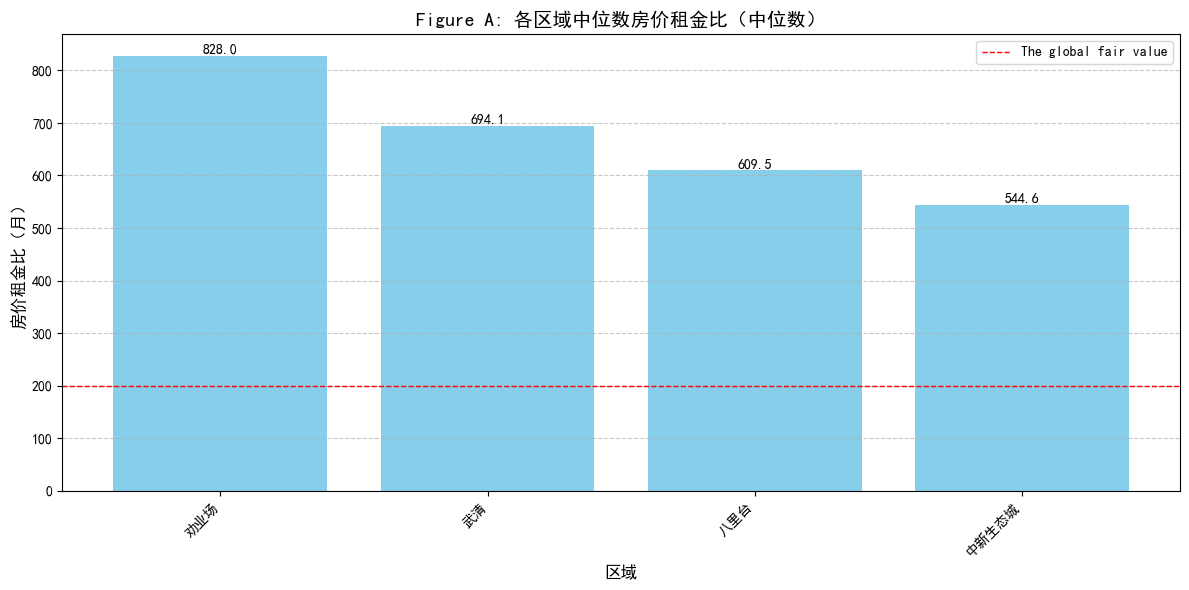

In [ ]:
# 读取数据
df=pd.read_csv('merged_df.csv')
# ----------------------------------------
# 1. 处理租金数据：计算每平方米月租
# ----------------------------------------
# 过滤有效租金数据（月租和租房面积均非空且大于0）
rent_data = df.dropna(subset=['area_zu', 'price_rent', 'area_rent'])
rent_data = rent_data[(rent_data['price_rent'] > 0) & (rent_data['area_rent'] > 0)].copy()
rent_data['unit_rent'] = rent_data['price_rent'] / rent_data['area_rent']
# 按区域分组，计算中位数每平方米月租
median_rent = rent_data.groupby('area_zu')['unit_rent'].median().reset_index()
median_rent.columns = ['area_zu', 'unit_rent']
# ----------------------------------------
# 2. 处理房价数据：计算中位数单价
# ----------------------------------------
# 过滤有效房价数据（单价和面积均非空且大于0）
price_data = df.dropna(subset=['area_esf', 'area_house'])
price_data = price_data[(price_data['price_house'] > 0) & (price_data['area_house'] > 0)].copy()
# 按区域分组，计算中位数单价
median_price = price_data.groupby('area_esf')['price_house'].median().reset_index()
median_price.columns = ['area_esf', 'unit_house']
# ----------------------------------------
# 3. 合并数据并计算房价租金比
# ----------------------------------------
# 按区域合并房价和租金的中位数
merged_ratio = pd.merge(median_price, median_rent, left_on='area_esf', right_on='area_zu', how='inner')  # 修改合并的列名

# 计算中位数房价租金比
merged_ratio['ratio'] = (
    merged_ratio['unit_house'] / 
    (merged_ratio['unit_rent'])
)

# 绘制房价租金比柱状图
def plot_ratio(data, title):
    plt.figure(figsize=(12, 6))
    data_sorted = data.sort_values('ratio', ascending=False)
    
    bars = plt.bar(data_sorted['area_esf'], 
                   data_sorted['ratio'],
                   color='skyblue')
    
    plt.title(title, fontsize=14)
    plt.xlabel('区域', fontsize=12)
    plt.ylabel('房价租金比（月）', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 红色虚线（y=200）
    plt.axhline(y=200, color='red', linestyle='--', linewidth=1, label='The global fair value')
    plt.legend(loc='upper right')  # 添加图例
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 结果展示
print("各区域中位数房价租金比：")
print(merged_ratio[['area_esf', 'ratio']].round(2))  # 修改输出的列名，以匹配合并后的列名
plot_ratio(merged_ratio, "Figure A: 各区域中位数房价租金比（中位数）")




4.Data Science

In [ ]:
# Load the merged data
price_rent=merged_rent_df.copy()
price_data=merged_price_df.copy()
# Model 1: 预测房价
X_price = price_data[['area_house', 'area_esf']]
y_price = price_data['price_house']

# 对位置进行独热编码
preprocessor_price = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['area_esf'])
    ],
    remainder='passthrough'
)

# 构建包含交互项的特征
X_price_encoded = preprocessor_price.fit_transform(X_price)
area_house_col = X_price_encoded[:, -1].reshape(-1, 1)
area_esf_encoded = X_price_encoded[:, :-1]
interaction_terms = area_house_col * area_esf_encoded
X_price_final = np.hstack((area_house_col, area_esf_encoded, interaction_terms))

# 训练模型
model_price = LinearRegression()
model_price.fit(X_price_final, y_price)

# Model 2: 预测租金
X_rent = rent_data[['area_rent', 'area_zu']]
y_rent = rent_data['unit_rent']

# 对位置进行独热编码
preprocessor_rent = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['area_zu'])
    ],
    remainder='passthrough'
)

# 构建包含交互项的特征
X_rent_encoded = preprocessor_rent.fit_transform(X_rent)
area_rent_col = X_rent_encoded[:, -1].reshape(-1, 1)
area_zu_encoded = X_rent_encoded[:, :-1]
interaction_terms_rent = area_rent_col * area_zu_encoded
X_rent_final = np.hstack((area_rent_col, area_zu_encoded, interaction_terms_rent))

# 训练模型
model_rent = LinearRegression()
model_rent.fit(X_rent_final, y_rent)

# 预测面积为50和100平方米的房价和租金
areas = [50, 100]
regions = price_data['area_esf'].unique()

predictions = []
for area in areas:
    for region in regions:
        # 构建输入特征
        area_col = np.array([[area]])
        area_encoded = preprocessor_price.transform(pd.DataFrame({'area_house': [area], 'area_esf': [region]}))[:, :-1]
        interaction = area_col * area_encoded
        X_pred_price = np.hstack((area_col, area_encoded, interaction))

        area_encoded_rent = preprocessor_rent.transform(pd.DataFrame({'area_rent': [area], 'area_zu': [region]}))[:, :-1]
        interaction_rent = area_col * area_encoded_rent
        X_pred_rent = np.hstack((area_col, area_encoded_rent, interaction_rent))

        # 预测房价和租金
        price_pred = model_price.predict(X_pred_price)[0]
        rent_pred = model_rent.predict(X_pred_rent)[0] * area

        # 计算房价租金比
        ratio = price_pred / (rent_pred/area)

        predictions.append({
            'area': area,
            'region': region,
            'price': price_pred,
            'rent': rent_pred,
            'ratio': ratio
        })

predictions_df = pd.DataFrame(predictions)
predictions_df


,area,region,price,rent,ratio
0,50,中新生态城,9328.338902,1327.478057,351.355672
1,50,八里台,22229.308166,2256.143063,492.639597
2,50,武清,10033.805507,800.966482,626.356142
3,50,劝业场,57351.317934,3413.599735,840.041633
4,100,中新生态城,12786.448375,2524.667377,506.460712
5,100,八里台,28472.194735,4402.580493,646.716052
6,100,武清,11554.205636,1770.354272,652.649349
7,100,劝业场,47588.914513,6794.652897,700.387720


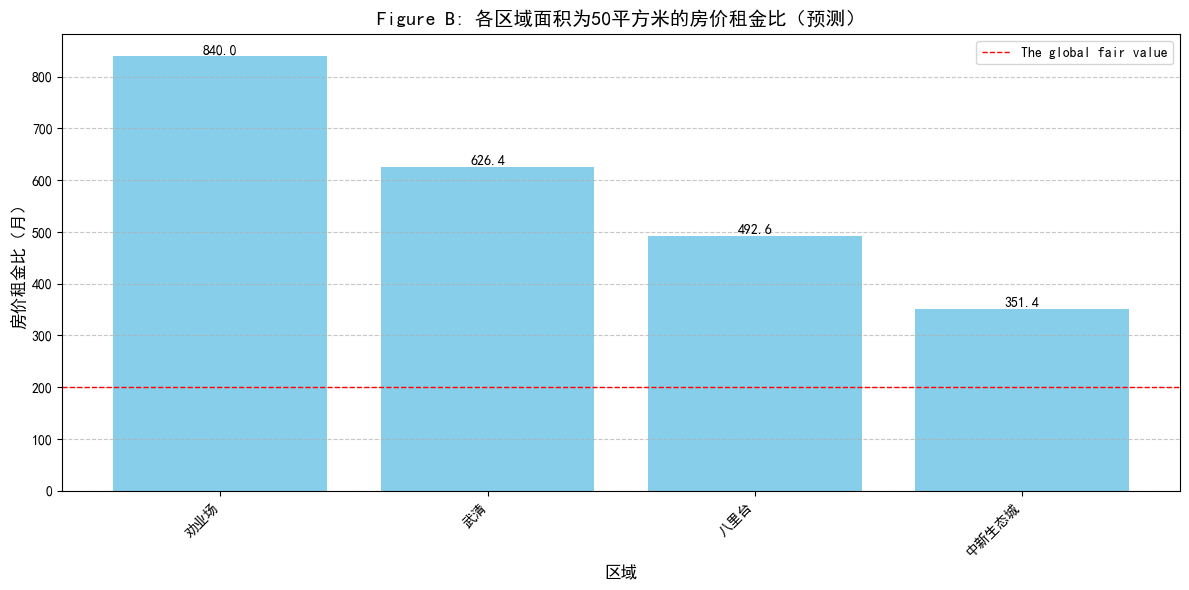

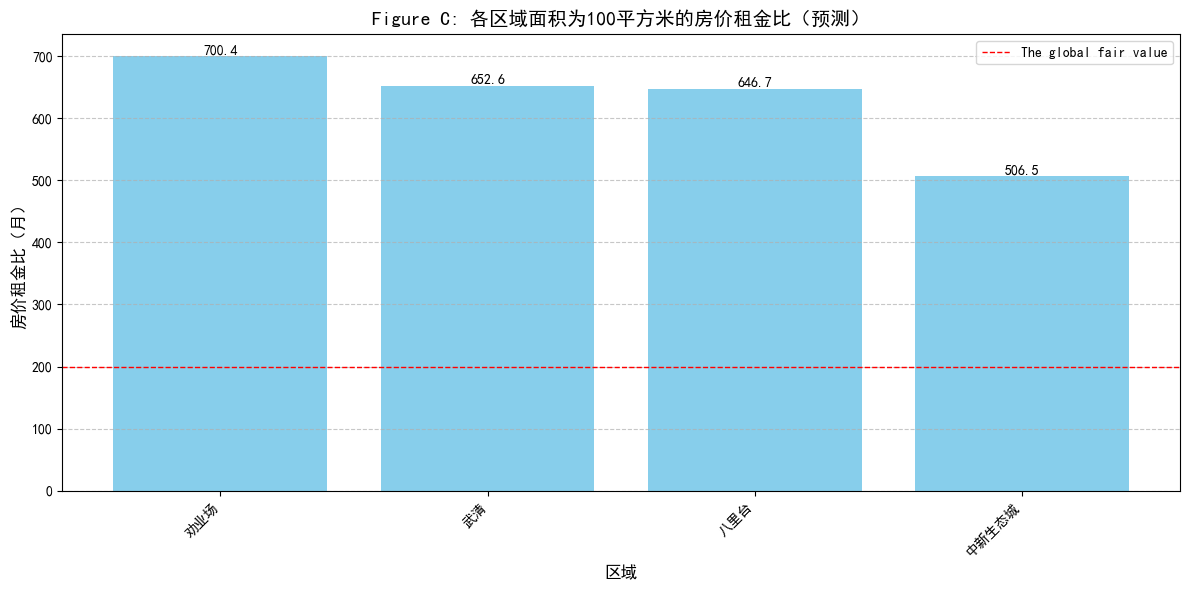

In [ ]:
# 绘制不同面积下各区域的房价租金比柱状图
def plot_ratio_area(data, area, title):
    plt.figure(figsize=(12, 6))
    data_area = data[data['area'] == area]
    data_sorted = data_area.sort_values('ratio', ascending=False)

    bars = plt.bar(data_sorted['region'],
                   data_sorted['ratio'],
                   color='skyblue')

    plt.title(title, fontsize=14)
    plt.xlabel('区域', fontsize=12)
    plt.ylabel('房价租金比（月）', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 红色虚线（y=200）
    plt.axhline(y=200, color='red', linestyle='--', linewidth=1, label='The global fair value')
    plt.legend(loc='upper right')  # 添加图例

    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.1f}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# 绘制面积为50平方米的房价租金比柱状图
plot_ratio_area(predictions_df, 50, "Figure B: 各区域面积为50平方米的房价租金比（预测）")

# 绘制面积为100平方米的房价租金比柱状图
plot_ratio_area(predictions_df, 100, "Figure C: 各区域面积为100平方米的房价租金比（预测）")